# Evaluate model calibration using folktexts

**Prerequisite**: Install folktexts package. Follow setup guide in the [README](https://github.com/socialfoundations/folktexts) or install it locally by navigating to the root folder of the reppository and running `> pip install -e .`

**Summary**: The script loads a language model from Huggingface and demonstrates how to use folktexts to get insights into model calibration, and plot the benchmark results. 

### 1. Check folktexts is installed

In [1]:
import folktexts
folktexts.__version__

'0.0.14'

### 2. Load Model from Huggingface

We use the Llama3-8B model for this demo. The workflow can similarly be applied to any model/tokenizer pair.

Set `hf_model_identifier` to the model's name on huggingface or to the path to a saved pretrained model.

In [2]:
from folktexts.llm_utils import load_model_tokenizer

# Note: make sure you have the necessary persmissions on Huggingface to download the model
# Note: use gpt2 for the demo if you need a smaller model

hf_model_identifier = "meta-llama/Meta-Llama-3-8B"
# hf_model_identifier = "gpt2"
model, tokenizer = load_model_tokenizer(hf_model_identifier)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

### 3. Create default benchmarking tasks

We generate ACSIncome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


In [3]:
from folktexts.benchmark import CalibrationBenchmark

# Note: this argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.01

bench = CalibrationBenchmark.make_acs_benchmark(
    model= model,
    tokenizer=tokenizer,
    task_name="ACSIncome",
    subsampling=subsampling_ratio,
)

Loading ACS data...


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [4]:
# Note: folder should exist
RESULTS_DIR = "res"
bench.run(results_root_dir = RESULTS_DIR)

Computing risk estimates:   0%|          | 0/105 [00:00<?, ?it/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


{'threshold': 0.5,
 'n_samples': 1665,
 'n_positives': 605,
 'n_negatives': 1060,
 'model_name': 'meta-llama--Meta-Llama-3-8B',
 'accuracy': 0.7213213213213213,
 'tpr': 0.824793388429752,
 'fnr': 0.17520661157024794,
 'fpr': 0.33773584905660375,
 'tnr': 0.6622641509433962,
 'balanced_accuracy': 0.7435287696865741,
 'precision': 0.5822637106184364,
 'ppr': 0.5147147147147147,
 'log_loss': 0.6383789756326194,
 'brier_score_loss': 0.22291120805170733,
 'accuracy_ratio': 0.0,
 'accuracy_diff': 1.0,
 'fnr_ratio': 0.0,
 'fnr_diff': 1.0,
 'tnr_ratio': 0.0,
 'tnr_diff': 1.0,
 'ppr_ratio': 0.0,
 'ppr_diff': 0.6634615384615384,
 'tpr_ratio': 0.0,
 'tpr_diff': 1.0,
 'balanced_accuracy_ratio': 0.0,
 'balanced_accuracy_diff': 1.0,
 'fpr_ratio': 0.0,
 'fpr_diff': 1.0,
 'precision_ratio': 0.0,
 'precision_diff': 1.0,
 'equalized_odds_ratio': 0.0,
 'equalized_odds_diff': 1.0,
 'roc_auc': 0.8298308124122875,
 'ece': 0.18116621586385906,
 'ece_quantile': 0.22174805210202211,
 'predictions_path': '/lustr

### 4. Visualize results

We can also visualize the results inline:

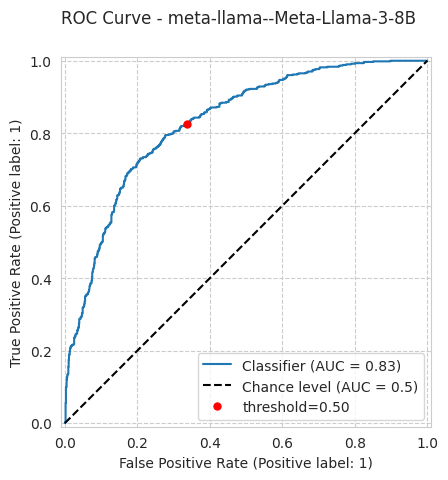

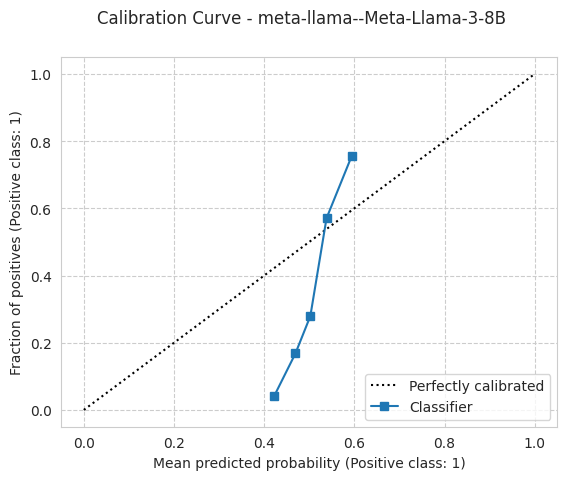

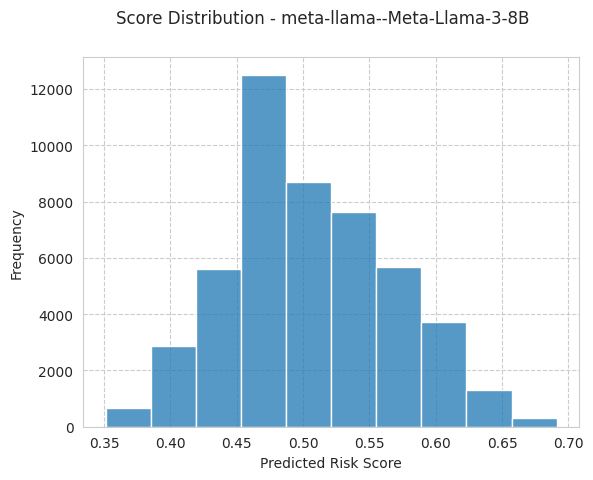

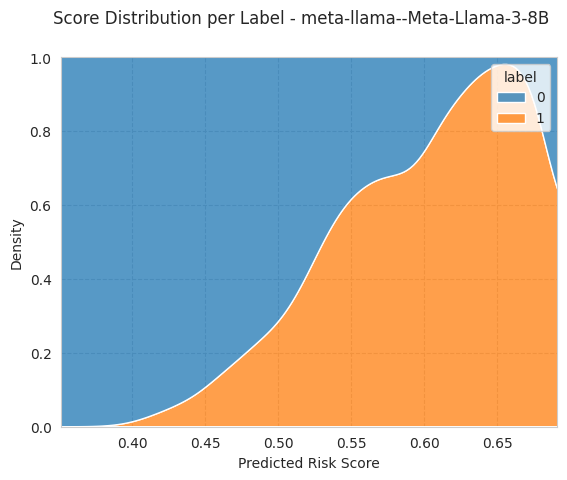

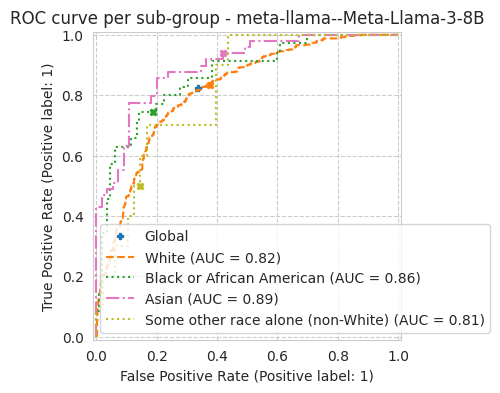

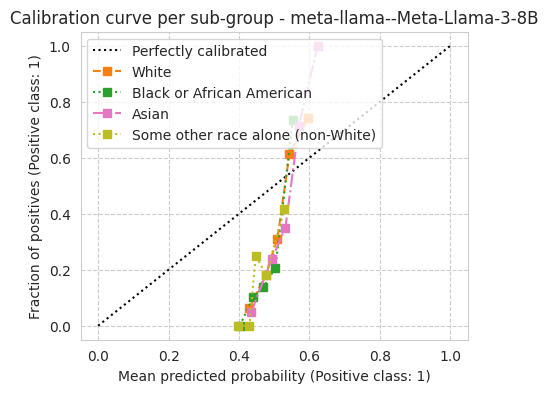

{'roc_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/roc_curve.pdf',
 'calibration_curve_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/calibration_curve.pdf',
 'score_distribution_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/lustre/home/acruz/folktexts/notebooks/res/meta-llama--Meta-Llama-3-8B_bench-1043142216/imgs/calibration_curve_per_subgroup.pdf'}

In [5]:
bench.plot_results()

---